In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.style.use('dark_background')

Text(0, 0.5, '# of counts')

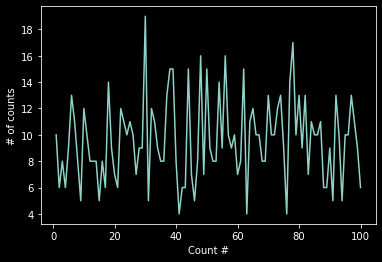

In [3]:
#1 second measurements
F = [10,6,8,6,9,13,11,8,5,12,10,8,8,8,5,8,6,14,9,7,6,12,11,10,11,10,7,9,9,19,5,12,11,9,8,8,13,15,15,
     8,4,6,6,15,7,5,8,16,7,15,9,8,8,14,9,16,10,9,10,7,8,15,4,11,12,10,10,8,8,13,10,10,12,13,9,4,14,17,
     10,13,9,13,7,11,10,10,11,6,6,9,5,13,10,5,10,10,13,11,9,6]
x = np.zeros(len(F))
for i in range(0, len(F)):
    x[i]= x[i-1]+1
plt.plot(x, F)
plt.xlabel('Count #')
plt.ylabel('# of counts')

In [4]:
#plt.hist(F, bins = 16)

In [5]:
F_mean = np.mean(F)
print("F_mean = ",F_mean)
lam = F_mean

F_mean =  9.63


In [6]:
m = np.array([i for i in range(0,20)])
p_m = np.exp(-lam) * ((lam**m) / scipy.special.factorial(m))

Chi squared = inf


C:\Users\jtear\anaconda3\lib\site-packages\scipy\stats\stats.py:5982: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        15.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,
         0., 16.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 4.  ,  4.15,  4.3 ,  4.45,  4.6 ,  4.75,  4.9 ,  5.05,  5.2 ,
         5.35,  5.5 ,  5.65,  5.8 ,  5.95,  6.1 ,  6.25,  6.4 ,  6.55,
         6.7 ,  6.85,  7.  ,  7.15,  7.3 ,  7.45,  7.6 ,  7.75,  7.9 ,
         8.05,  8.2 ,  8.35,  8.5 ,  8.65,  8.8 ,  8.95,  9.1 ,  9.25,
         9.4 ,  9.55,  9.7 ,  9.85, 10.  , 10.15, 10.3 , 10.45, 10.6 ,
        10.75, 10.9 , 11.05, 11.2 , 11.35, 11.5 , 11.65, 11.8 , 11.95,
        

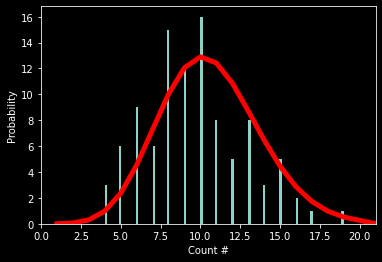

In [7]:
#Poisson distribution
P = np.zeros(len(F))
for i in range(1, 20):
    P[i] = np.exp(-lam) * ((lam**i) / np.math.factorial(i))
plt.plot(x, P*100, linewidth=5, c= 'red')
plt.xlabel("Count #")
plt.ylabel("Probability")
plt.xlim([0,21])
chi_sq = stats.chisquare(F, P)
print("Chi squared =",chi_sq[0])

#data
plt.hist(F, bins = 100)
#plt.savefig('Theoretical Poisson distribution vs data')

In [8]:
#7.4.4
V_t = 480 #mV
V_p = 960 #mV
Voltage = 860 #V
tau = 500 #microseconds

#Number of counts / 5 seconds

#Source a (#15)
n_a = [1210, 1224, 1150]
n_a_avg = np.mean(n_a)

#Sources a and b together
n_ab = [2112, 2070, 2128]
n_ab_avg = np.mean(n_ab)

#Source b (#16)
n_b = [1202, 1246, 1169]
n_b_avg = np.mean(n_b)

## 2-9: 7.5 Absorbtion of gamma rays by lead

In [9]:
#measurement notes:
#voltage = 840V
#cardboard cap on for all following measurements, but off for previous measurements
#distance from counter to stand = 50mm

In [10]:
#50 minute background count
#background = 1178

#b = 10000 #big size (mm^2)
#s = 5625 #small size (mm^2)
#rho = 0.01136 #density of lead (g/mm^2)

#absorber thickness: rho*x = mass/area
#mass_small = np.array([111,58,114,113,118,58,116,114])
#mass_big = np.array([96,98,200,95,199,90,89,190,775,202])
#thickness_small = mass_small / s   #[mass]/area
#thickness_big = mass_big / b   #[mass]/area
#thickness_combined = np.concatenate((thickness_small, thickness_big))
#mass_combined = np.concatenate((mass_small, mass_big))
#thickness_total = (np.sum(thickness_combined)) / rho
#print("Masses of lead plates in order (bottom to top):",mass_combined)
#print("Total absorber thickness =",thickness_total,"mm")

Masses of lead plates in order (bottom to top): [111  58 114 113 118  58 116 114  96  98 200  95 199  90  89 190 775 202]
Total absorber thickness = 30.455790297339593 mm


In [11]:
#Measurements(m): (count, time(s))
#Thickness(t)
#m1 = [1502, 2322]  #t=2322s
#t1 = thickness_combined[:]
#m2 = [1500, 1800]
#t2 = thickness_combined[:] #minus top 3 from small


#### 2-14

In [15]:
#lab notes:
#measurements with counter cap off
#distance from plate to counter = 


In [43]:
background  

b = 10000 #area of big lead plates (mm^2)
s = 5625 #area of small lead plates (mm^2)
rho = 0.01136 #density of lead (g/mm^2)

#absorber thickness: rho*x = mass/area
mass_small = np.array([115,114,59,112,118,112,56,112,59,114,115,57,56,59,58,112,112]) #mass of small lead plates (grams)
mass_big = np.array([94,94,199,95,97,198]) #masses of big lead plates (grams)

thickness_small = mass_small / s   #[mass]/area
thickness_big = mass_big / b   #[mass]/area
thickness_combined = np.concatenate((thickness_small, thickness_big))
mass_combined = np.concatenate((mass_small, mass_big))
thickness_total = (np.sum(thickness_combined)) / rho
print("Masses of lead plates in order (bottom to top):",mass_combined)
print("Total absorber thickness =",thickness_total,"mm")
print("Total number of plates = ",len(mass_combined))

Masses of lead plates in order (bottom to top): [115 114  59 112 118 112  56 112  59 114 115  57  56  59  58 112 112  94
  94 199  95  97 198]
Total absorber thickness = 30.93994522691706 mm
Total number of plates =  23


In [67]:
#measurement: m = [counts, time(s)]
#Intensity: I = counts/time(s) = m[0]/m[1] 
#Thickness t(mm) = mass/area/density
#measuring the time it takes to reach 1200 counts for each thickness
#we adjust the thickness by removing plates off the top of the stack
    #--> thickness_combined[:-n] where n is the cumulative number of plates that have been removed
    
m1 = [1200,2243]
I1 = m1[0]/m1[1]
t1 = (np.sum(thickness_combined[:]))/rho
print("Thickness 1 =", t1)
print("Intensity 1 =",I1)
print("")

m2 = [1200,1913]
I2 = m2[0]/m2[1]
t2 = (np.sum(thickness_combined[:-4]))/rho
print("Thickness 2 =", t2)
print("Intensity 2 =",I2)
print("")

m3 = [1200,1422]
I3 = m3[0]/m3[1]
t3 = (np.sum(thickness_combined[:-8]))/rho
print("Thickness 3 =", t3)
print("Intensity 3 =",I3)
print("")

m4 = [1200,1031]
I4 = m4[0]/m4[1]
t4 = (np.sum(thickness_combined[:-13]))/rho
print("Thickness 4 =", t4)
print("Intensity 4 =",I4)
print("")

m5 = [1200,709]
I5 = m5[0]/m5[1]
t5 = (np.sum(thickness_combined[:-16]))/rho
print("Thickness 5 =", t5)
print("Intensity 5 =",I5)
print("")

m6 = [1200,498]
I6 = m6[0]/m6[1]
t6 = (np.sum(thickness_combined[:-19]))/rho
print("Thickness 6 =", t6)
print("Intensity 6 =",I6)
print("")

m7 = [1200,327]
I7 = m7[0]/m7[1]
t7 = (np.sum(thickness_combined[:-21]))/rho
print("Thickness 7 =", t7)
print("Intensity 7 =",I7)
print("")

m8 = [1200,15]
I8 = m8[0]/m8[1]
t8 = (np.sum(thickness_combined[:-23]))/rho
print("Thickness 8 =", t8)
print("Intensity 8 =",I8)
print("")


Thickness 1 = 30.93994522691706
Intensity 1 = 0.5349977708426215

Thickness 2 = 25.755086071987485
Intensity 2 = 0.6272869837950863

Thickness 3 = 20.59467918622848
Intensity 3 = 0.8438818565400844

Thickness 4 = 15.195618153364633
Intensity 4 = 1.1639185257032008

Thickness 5 = 10.735524256651017
Intensity 5 = 1.692524682651622

Thickness 6 = 6.259780907668231
Intensity 6 = 2.4096385542168677

Thickness 7 = 3.583724569640063
Intensity 7 = 3.669724770642202

Thickness 8 = 0.0
Intensity 8 = 80.0



In [70]:
counts_combined = [m1[0],m2[0],m3[0],m4[0],m5[0],m6[0],m7[0],m8[0]]
time_combined = [m1[1],m2[1],m3[1],m4[1],m5[1],m6[1],m7[1],m8[1]]
thickness_combined = [t1,t2,t3,t4,t5,t6,t7,t8]

intensity_combined = np.zeros(len(counts_combined))
for i in range(0,len(counts_combined)):
    intensity_combined[i] = counts_combined[i] / time_combined[i]

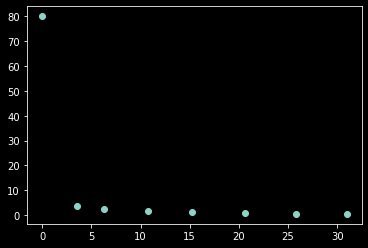

In [75]:
plt.scatter(thickness_combined[:], intensity_combined[:])